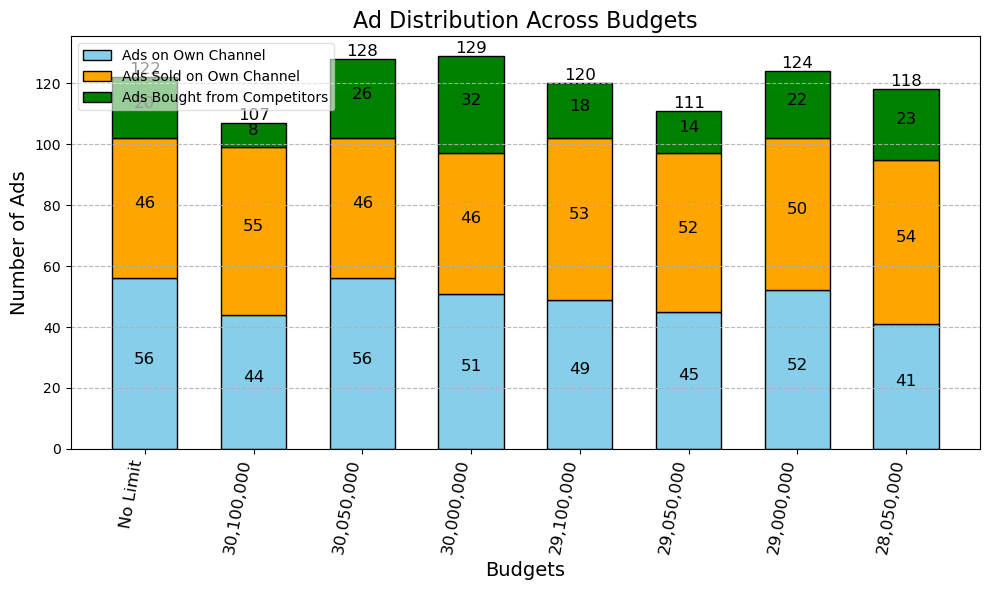

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os

if not os.path.exists('Image_Analysis'):
    os.makedirs('Image_Analysis')

# Data
budgets = ['No Limit', '30,100,000', '30,050,000', '30,000,000', '29,100,000', '29,050,000', '29,000,000', '28,050,000']
ads_own = [56, 44, 56, 51, 49, 45, 52, 41]  # Ads placed on own channel
ads_sold = [46, 55, 46, 46, 53, 52, 50, 54]  # Ads sold on own channel
ads_bought = [20, 8, 26, 32, 18, 14, 22, 23]  # Ads bought from competitors

total_ads = np.array(ads_own) + np.array(ads_sold) + np.array(ads_bought)

# Bars
bar_width = 0.6
x_positions = np.arange(len(budgets))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_positions, ads_own, width=bar_width, label='Ads on Own Channel', color='skyblue', edgecolor='black')
ax.bar(x_positions, ads_sold, width=bar_width, bottom=ads_own, label='Ads Sold on Own Channel', color='orange', edgecolor='black')
ax.bar(x_positions, ads_bought, width=bar_width, bottom=np.array(ads_own) + np.array(ads_sold), label='Ads Bought from Competitors', color='green', edgecolor='black')

ax.set_xlabel('Budgets', fontsize=14)
ax.set_ylabel('Number of Ads', fontsize=14)
ax.set_title('Ad Distribution Across Budgets', fontsize=16)
ax.set_xticks(x_positions)
ax.set_xticklabels(budgets, rotation=80, ha='right', fontsize=12)
ax.legend(loc='upper left', fontsize=10, framealpha=0.6)

for i, total in enumerate(total_ads):
    ax.text(x_positions[i], total + 1, f'{total}', ha='center', fontsize=12, color='black')
    ax.text(x_positions[i], ads_own[i] / 2, f'{ads_own[i]}', ha='center', fontsize=12, color='black')  # For Ads on Own Channel
    ax.text(x_positions[i], ads_own[i] + ads_sold[i] / 2, f'{ads_sold[i]}', ha='center', fontsize=12, color='black')  # For Ads Sold on Own Channel
    ax.text(x_positions[i], ads_own[i] + ads_sold[i] + ads_bought[i] / 2, f'{ads_bought[i]}', ha='center', fontsize=12, color='black')  # For Ads Bought from Competitors

ax.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()

plt.savefig('Image_Analysis/Ad_Distribution_Across_Budgets.jpg', dpi=300)
plt.show()


In [8]:
import warnings
import pandas as pd
import os
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

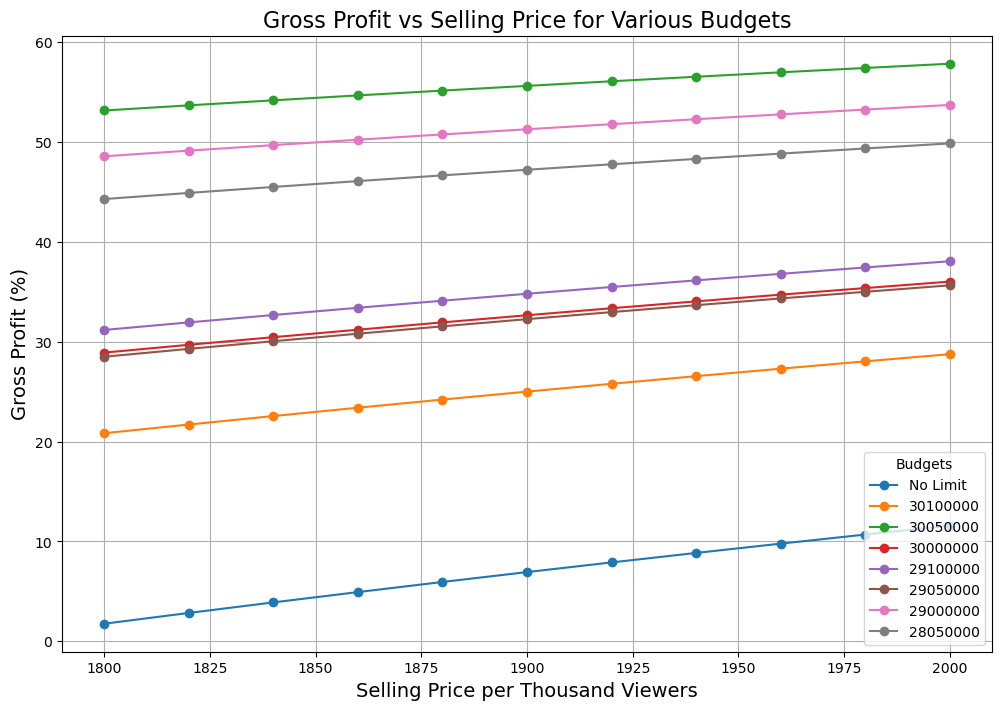

Combined plot saved to Image_Analysis/Gross_Profit_vs_Selling_Price_All_Budgets.jpg


In [14]:
files = [
    'output/output_3LatDays_OurMovies_2024-11-21_20-37-20.738063.csv',
    'output/Sentivity_output_3LastDays_2024-11-23_08-58-35.053220_budget_30100000.csv',
    'output/Sentivity_output_3LastDays_2024-11-23_11-59-47.870448_budget_30050000.csv',
    'output/Sentivity_output_3LastDays_2024-11-23_17-03-54.846653_budget_30000000.csv',
    'output/Sentivity_output_3LastDays_2024-11-23_23-41-48.705903_budget_29100000.csv',
    'output/Sentivity_output_3LastDays_2024-11-24_03-41-41.287624_budget_29050000.csv',
    'output/Sentivity_output_3LastDays_2024-11-24_06-51-31.148359_budget_29000000.csv',
    'output/Sentivity_output_3LastDays_2024-11-24_17-25-04.411657_budget_28050000.csv'
]

movie_db_df = pd.read_csv('data/filtered_movie_database_weekend.csv', parse_dates=['release_date'])
selling_prices = [1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000]

if not os.path.exists('Image_Analysis'):
    os.makedirs('Image_Analysis')

plt.figure(figsize=(12, 8))

for file in files:
    if "budget" in file:
        budget = int(file.split('_')[-1].replace('.csv', '').replace('budget_', ''))
    else:
        budget = "No Limit"

    schedule_df = pd.read_csv(file)

    movies_shown = schedule_df.loc[schedule_df['Action'] == "Show Movie", ["Movie Title"]]
    movies_shown_ls = movies_shown["Movie Title"].unique()
    movies_shown_db_df = movie_db_df[movie_db_df['title'].isin(movies_shown_ls)]
    total_cost = schedule_df.at[0, 'Viewerships']

    sold_ad_df = schedule_df.loc[
        (schedule_df['Channel'] == 'Own Channel') &
        (schedule_df['Action'] == 'Sell Adslot')
    ]
    sold_ad_df['Viewerships'] = (sold_ad_df['Viewerships'] / 1000).astype(int) * 1000
    rounded_views = sold_ad_df['Viewerships'].sum()/1000 # div by 1000

    gp_dict = {}
    for price in selling_prices:
        gross_profit_percent = 100 * (rounded_views * price - total_cost) / (rounded_views * price)
        gp_dict[price] = round(gross_profit_percent, 3)

    x = list(gp_dict.keys())
    y = list(gp_dict.values())

    plt.plot(x, y, marker='o', linestyle='-', label=f'{budget}')

plt.title('Gross Profit vs Selling Price for Various Budgets', fontsize=16)
plt.xlabel('Selling Price per Thousand Viewers', fontsize=14)
plt.ylabel('Gross Profit (%)', fontsize=14)
plt.grid(True)
plt.legend(title='Budgets', fontsize=10, loc='lower right')

output_combined_path = 'Image_Analysis/Gross_Profit_vs_Selling_Price_All_Budgets.jpg'
plt.savefig(output_combined_path)
plt.show()

print(f"Combined plot saved to {output_combined_path}")


In [10]:
for file in files:
    df = pd.read_csv(file)

    # Exclude the first row where ID = 'Cost'
    filtered_df = df[df['ID'] != 'Cost']

    filtered_df['Viewerships'] = pd.to_numeric(filtered_df['Viewerships'], errors='coerce').fillna(0)

    max_viewership = filtered_df['Viewerships'].max()
    avg_viewership = filtered_df['Viewerships'].mean()
    sum_viewership = filtered_df['Viewerships'].sum()

    if "budget" in file:
        budget = file.split('_')[-1].replace('.csv', '').replace('budget_', '')
    else:
        budget = "No Limit"

    print(f"Results for budget {budget}:")
    print(f"Maximum Viewership: {max_viewership}")
    print(f"Average Viewership: {avg_viewership}")
    print(f"Sum of Viewerships: {sum_viewership}")
    print("-" * 50)


Results for budget No Limit:
Maximum Viewership: 1000000.0
Average Viewership: 73669.80357142857
Sum of Viewerships: 16502036.0
--------------------------------------------------
Results for budget 30100000:
Maximum Viewership: 1000000.0
Average Viewership: 104078.16915422886
Sum of Viewerships: 20919712.0
--------------------------------------------------
Results for budget 30050000:
Maximum Viewership: 1000000.0
Average Viewership: 151729.48260869566
Sum of Viewerships: 34897781.0
--------------------------------------------------
Results for budget 30000000:
Maximum Viewership: 1000000.0
Average Viewership: 105957.45794392523
Sum of Viewerships: 22674896.0
--------------------------------------------------
Results for budget 29100000:
Maximum Viewership: 1000000.0
Average Viewership: 103340.5
Sum of Viewerships: 22941591.0
--------------------------------------------------
Results for budget 29050000:
Maximum Viewership: 1000000.0
Average Viewership: 106511.56521739131
Sum of Viewer

[1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.98,
 2,
 1.8,
 1.82,
 1.84,
 1.86,
 1.88,
 1.9,
 1.92,
 1.94,
 1.96,
 1.